# A Quick Demo of the James-Stein Estimator

Kyle Cranmer, June 25, 2015

[![](https://i.creativecommons.org/l/by/4.0/88x31.png)]( https://creativecommons.org/licenses/by/4.0/)

## The Problem


Consider a standard multivariate Gaussian distribution for $\vec x$ in $n$ dimensions centered around $\vec\mu$

\begin{equation}
f(\vec{x}|\vec{\mu}) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{(x_i- \mu_i)^2}{2}\right)\;.
\end{equation}


We want to compare the mean squared error
\begin{equation}
E[||\bar{\vec x}-\vec\mu||^2])
\end{equation}

of the sample mean (an unbiased estimator)
\begin{equation}
\overline x_i = \frac{1}{m} \sum_{j=1}^m x_{ij}
\end{equation}

to the James-Stein estimator
\begin{equation}
x_{JS} = \left( 1 - \frac{n-2}{||\bar{x}||^2} \right) \bar{x} 
\end{equation}


(where $i$ is the component of the vector and $j$ is an index over the samples).


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def jamesSteinEstimator(x):
    return x*(1. - (x.size-2.)/sum(x*x))

In [3]:
def RMS(x,mean):
    return sqrt(sum((x-mean)*(x-mean)))

In [4]:
def doRun(nDim,nSamp=1000):
    mean=zeros(nDim)
    data = zeros(nDim*nSamp).reshape(nDim,nSamp)
    for i in range(nDim):
        mean[i] = 0.5 #set value of the mean's components here 
        data[i,:] = random.normal(mean[i],1,nSamp).T
    data=data.T

    avRMS_js = 0
    avRMS_mle = 0
    for x in data:
        avRMS_js += RMS(jamesSteinEstimator(x),mean)
        avRMS_mle += RMS(x,mean)
    avRMS_js /= nSamp
    avRMS_mle /= nSamp
    return (avRMS_js, avRMS_mle)

In [5]:
nDimToTest = linspace(2,20)
av_js = zeros(nDimToTest.size)
av_mle = zeros(nDimToTest.size)
for i,nDim in enumerate(nDimToTest):
    [av_js[i], av_mle[i]] = doRun(int(nDim))

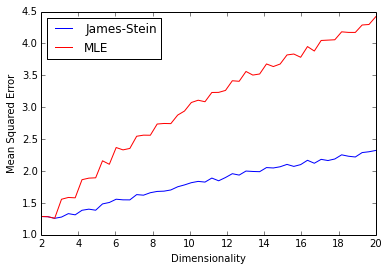

In [6]:
plt.plot(nDimToTest,av_js,c='b') #James Stein in blue
plt.plot(nDimToTest,av_mle,c='r') #MLE in red
plt.ylabel('Mean Squared Error')
plt.xlabel('Dimensionality')
plt.legend(('James-Stein', 'MLE'), loc='upper left')
plt.savefig('james-stein.pdf')